In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import dfols
import signal
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy import interpolate, integrate
from stopit import threading_timeoutable as timeoutable
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from batfuns import *
plt.rcParams = set_rc_params(plt.rcParams)
import winsound
from pybamm import exp, constants, Parameter
import pickle
eSOH_DIR = "../data/esoh_R/"
oCV_DIR = "../data/ocv/"
cyc_DIR = "../data/cycling/"
fig_DIR = "../figures/figures_temperature/"
res_DIR = "../data/results/"
resistance_DIR = "../data/resistance/"
# %matplotlib widget

In [2]:
cells = np.arange(1,22)
esoh_data = {}
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    esoh_data[cell] = dfe

In [4]:
esoh_vars = ["x_100", "y_0", "C_n", "C_p", "Capacity [A.h]", "Loss of lithium inventory [%]"]
colors =["tab:green","tab:blue","tab:red","tab:orange","tab:grey"]
colors =["green","blue","red","orange","grey"]
markers = ["x","o","v","+"]

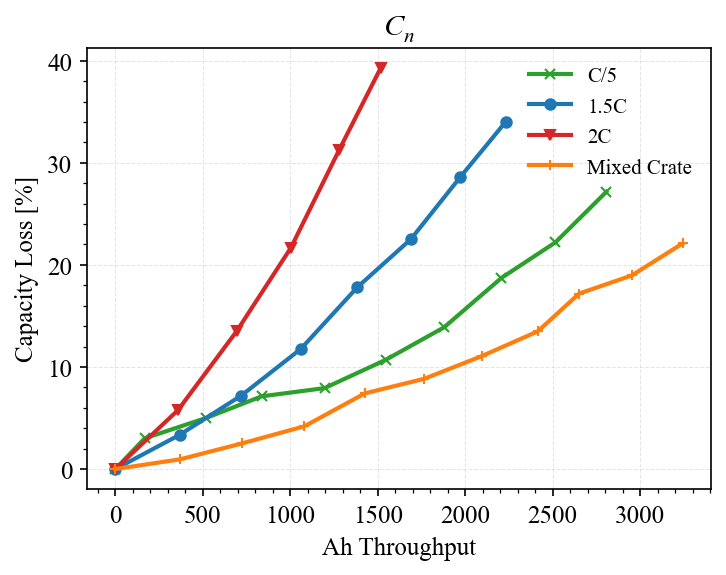

In [14]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
cells = [1,4,7,10]
ax1 = ax
name = "C_n"
colors =["tab:green","tab:blue","tab:red","tab:orange","tab:grey"]
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
# cells = [1+2,4+2,7+2,10+2]
# name = "C_n"
# for i,n in enumerate(cells):
#     ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i],linestyle='dashed')

ax1.set_title(r"$C_n$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax1.set_xlabel("Ah Throughput")
# fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Room_temp_crate_Cn_100DOD.png")
plt.show()

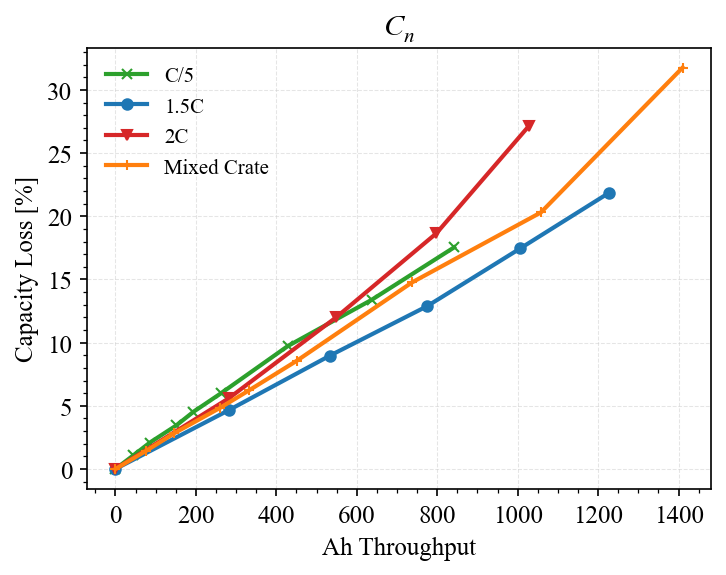

In [24]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
cells = [1+2,4+2,7+2,10+2]
ax1 = ax
name = "C_n"
colors =["tab:green","tab:blue","tab:red","tab:orange","tab:grey"]
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
# cells = [1+2,4+2,7+2,10+2]
# name = "C_n"
# for i,n in enumerate(cells):
#     ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i],linestyle='dashed')

ax1.set_title(r"$C_n$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax1.set_xlabel("Ah Throughput")
# fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Hot_temp_crate_Cn_100DOD.png")
plt.show()

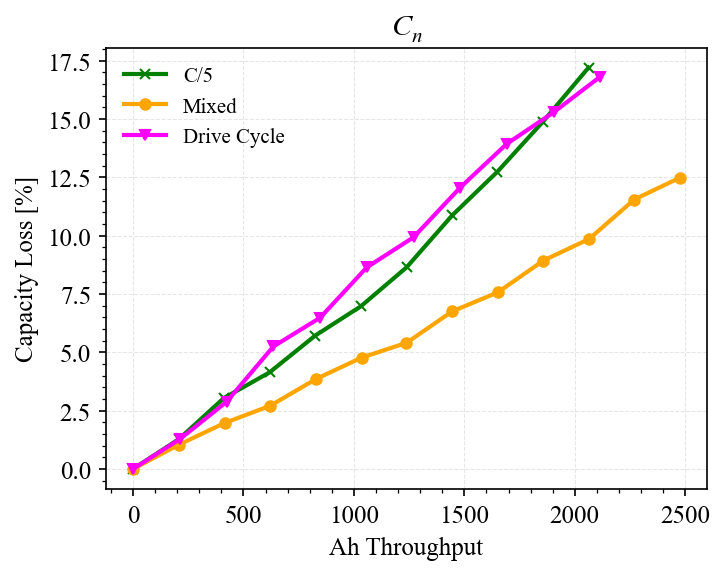

In [25]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
cells = [13,16,19]
ax1 = ax
name = "C_n"
colors =["green","orange","magenta"]
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","Mixed","Drive Cycle","Mixed Crate"])
# cells = [13+2,16+2,19+2]
# name = "C_n"
# for i,n in enumerate(cells):
#     ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i],linestyle='dashed')

ax1.set_title(r"$C_n$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax1.set_xlabel("Ah Throughput")
# fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Room_temp_crate_Cn_50DOD.png")
plt.show()

In [ ]:
ax.plot(dfe["Ah_th"],dfe["Cap"]/dfe["Cap"][0]*100,linestyle="None",marker="o",label='_nolegend_',color=colors[i])

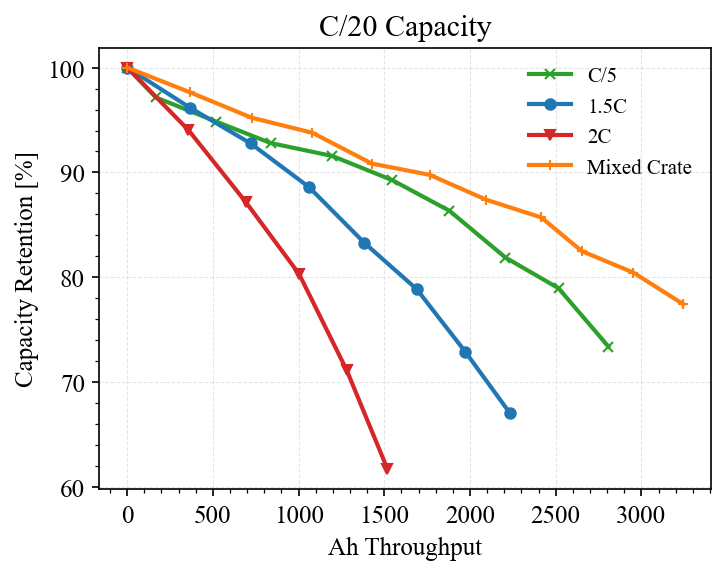

In [23]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
cells = [1,4,7,10]
ax1 = ax
name = "Cap"
colors =["tab:green","tab:blue","tab:red","tab:orange","tab:grey"]
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
# cells = [1+2,4+2,7+2,10+2]
# name = "C_n"
# for i,n in enumerate(cells):
#     ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i],linestyle='dashed')

ax1.set_title(r"C/20 Capacity")
ax1.set_ylabel(r"Capacity Retention [%]")
ax1.set_xlabel("Ah Throughput")
# fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Room_temp_crate_Cap_100DOD.png")
plt.show()

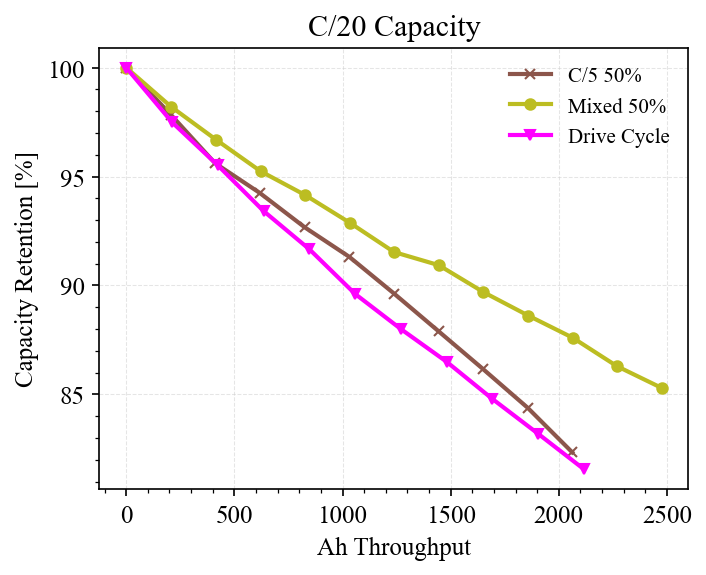

In [22]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
cells = [13,16,19]
ax1 = ax
name = "Cap"
colors = ["tab:brown","tab:olive","magenta"]
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5 50%","Mixed 50%","Drive Cycle"])
# cells = [13+2,16+2,19+2]
# name = "C_n"
# for i,n in enumerate(cells):
#     ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i],linestyle='dashed')

ax1.set_title(r"C/20 Capacity")
ax1.set_ylabel(r"Capacity Retention [%]")
ax1.set_xlabel("Ah Throughput")
# fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Room_temp_crate_Cap_50DOD.png")
plt.show()